# Лабораторна робота №1

#### Тема: Аналіз одновимірного часового ряду

#### Виконали студенти груп КА-21 та КА-24 Акименко Валерія, Герман Вікторія, Жигалов Олександр, Людоговська Анна.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### _Завдання 1_

Обраний часовий ряд: https://www.kaggle.com/datasets/rakannimer/air-passengers

Період спостережень: Січень 1949 - Грудень 1960

Кількість значень: 144 спостереження

Одиниці вимірювання: Тисячі пасажирів ($10^3$)

Типи стовпців: Month (datetime), Passengers (int64)

#### _Завдання 2_

In [42]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Мінімальне значення - 1949-11 104

Максимальне значення - 1960-07 622

Середнє значення - 280.3

Медіана - 265.5

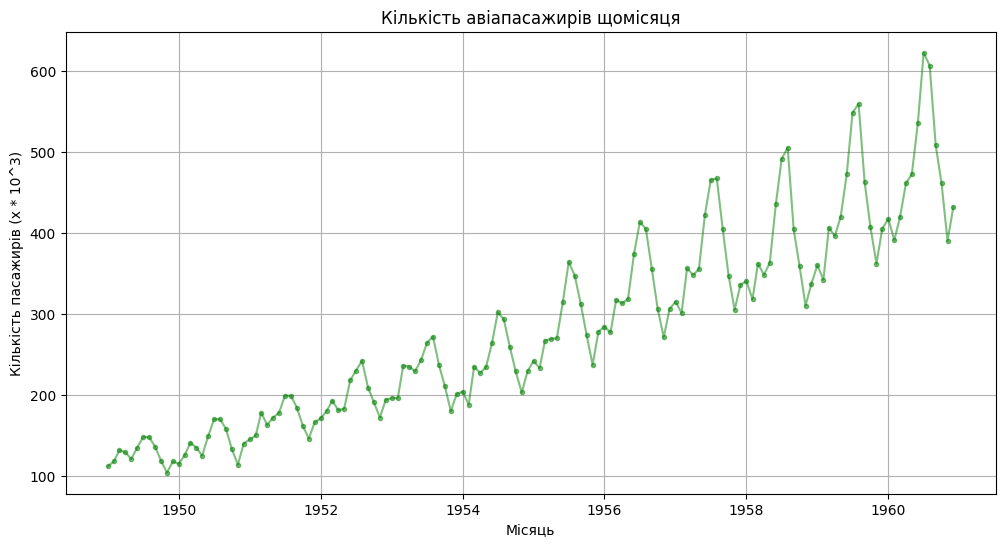

In [43]:
df['Month'] = pd.to_datetime(df['Month'])

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'], marker='.', linestyle='-', color='g', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

На графіку чітко видно стійкий тренд протягом усього періоду (1949–1960), що свідчить про загальне зростання обсягів авіаперевезень.

Спостерігаються повторювані сезонні коливання з піками влітку та спадами в осінньо-зимовий період.

Також можна побачити, що розмах сезонних коливань зростає разом із трендом.

У висновку, можна сказати, що ряд має висхідний тренд та певну сезонність

#### _Завдання 3_

Обраний ряд не має пропусків, тому вони будуть створені штучно (15% від розміру датасету)

In [44]:
if os.path.exists('AirPassengers_with_gaps.csv'):
    n_missing = int(len(df) * 0.15)

    np.random.seed(42)
    missing_indices = np.random.choice(df.index, n_missing, replace=False)

    df_with_gaps = df.copy()
    df_with_gaps.loc[missing_indices, '#Passengers'] = np.nan

    df_with_gaps.to_csv('AirPassengers_with_gaps.csv', index=False)
else:
    df_with_gaps = pd.read_csv('AirPassengers.csv')

In [45]:
df_with_gaps

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Кількість значень - 144

Пропусків - 21

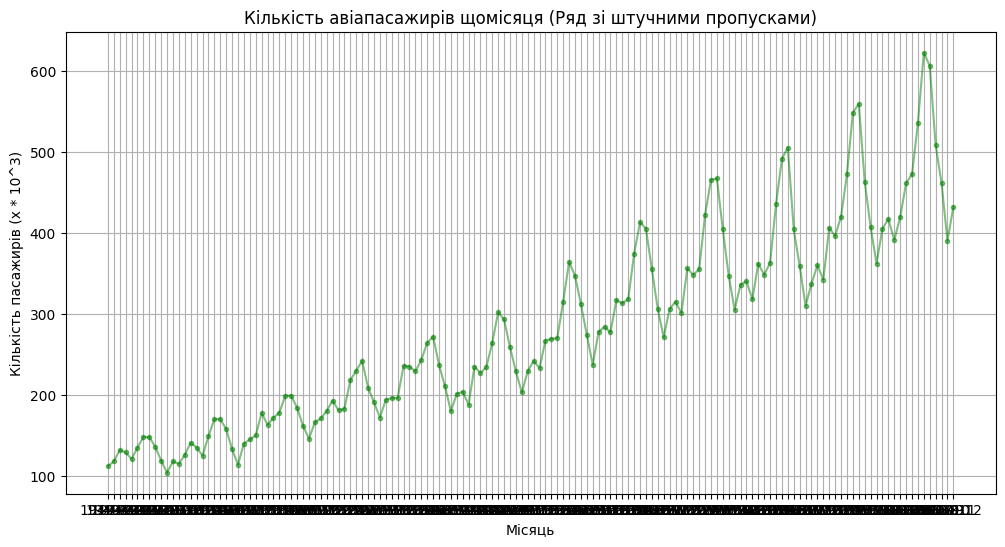

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df_with_gaps['Month'], df_with_gaps['#Passengers'], marker='.', linestyle='-', color='g', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі штучними пропусками)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Метод 1: Лінійна інтерполяція

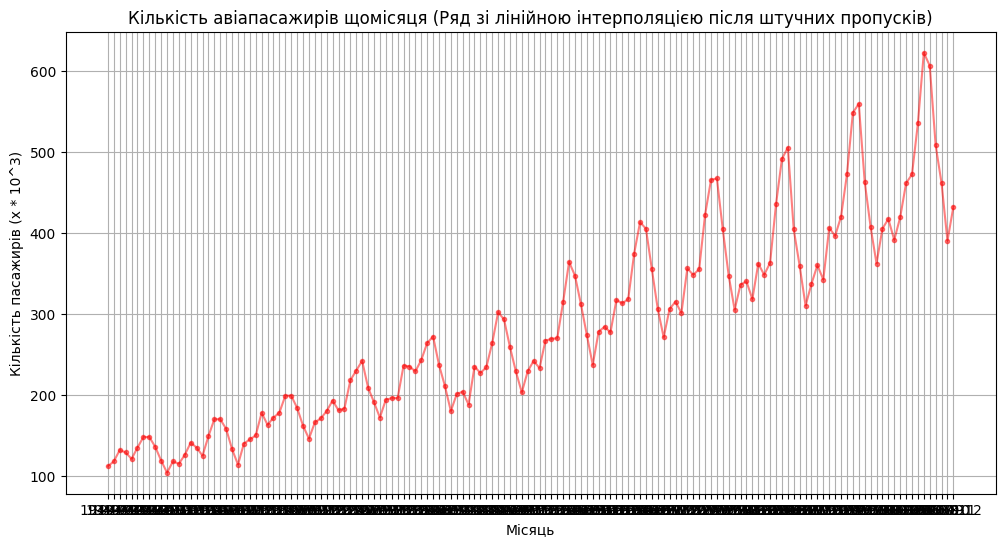

In [47]:
df_interpolated = df_with_gaps.copy()
df_interpolated['#Passengers'] = df_interpolated['#Passengers'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
plt.plot(df_interpolated['Month'], df_interpolated['#Passengers'], marker='.', linestyle='-', color='r', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі лінійною інтерполяцією після штучних пропусків)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Метод 2: Попереднє спостереження

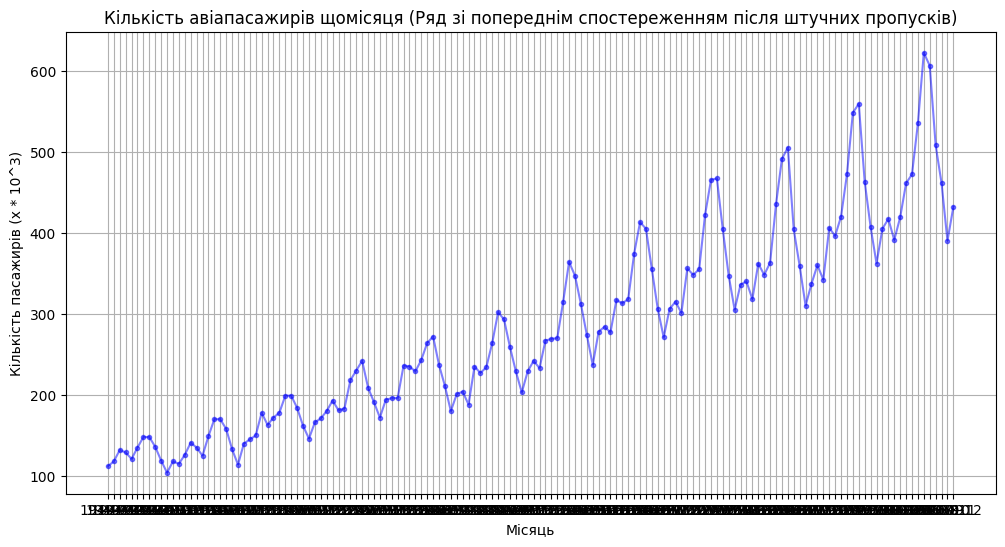

In [48]:
df_ffill = df_with_gaps.copy()
df_ffill['#Passengers'] = df_ffill['#Passengers'].ffill()

plt.figure(figsize=(12, 6))
plt.plot(df_ffill['Month'], df_ffill['#Passengers'], marker='.', linestyle='-', color='b', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі попереднім спостереженням після штучних пропусків)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Порівняння оригінального та заповнених рядів

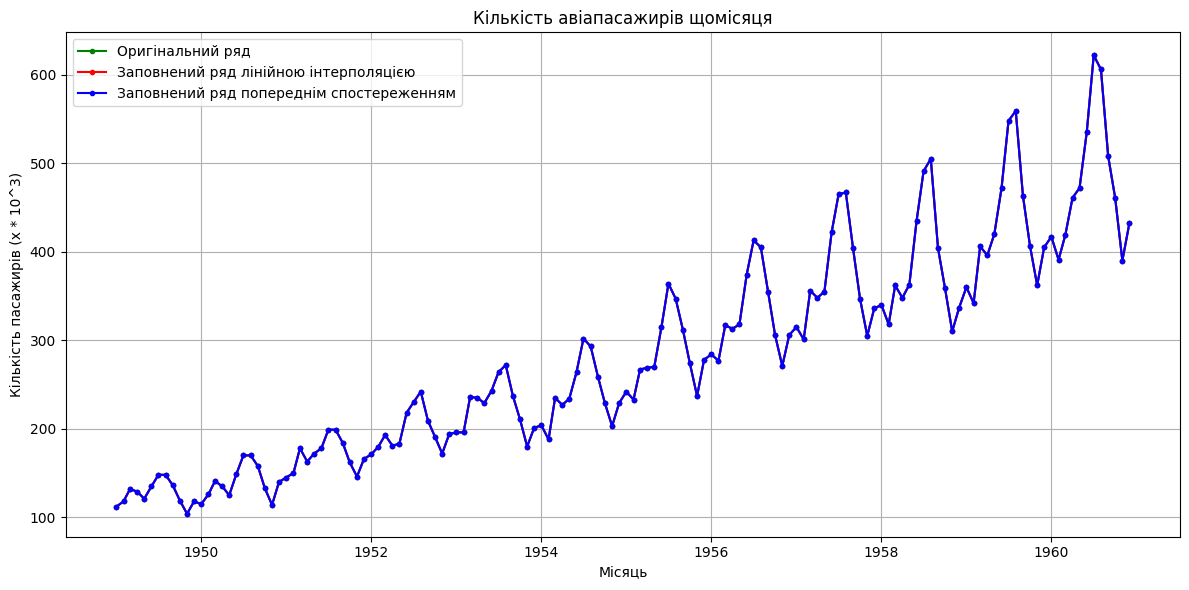

In [49]:
df['Month'] = pd.to_datetime(df['Month'])
df_interpolated['Month'] = pd.to_datetime(df_interpolated['Month'])
df_ffill['Month'] = pd.to_datetime(df_ffill['Month'])

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'], label='Оригінальний ряд', marker='.', linestyle='-', color='g', alpha=1)
plt.plot(df_interpolated['Month'], df_interpolated['#Passengers'], label='Заповнений ряд лінійною інтерполяцією', marker='.', linestyle='-', color='r', alpha=1)
plt.plot(df_ffill['Month'], df_ffill['#Passengers'], label='Заповнений ряд попереднім спостереженням', marker='.', linestyle='-', color='b', alpha=1)

plt.title('Кількість авіапасажирів щомісяця')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [50]:
df_union = pd.concat([df, df_interpolated['#Passengers'].rename('Interpolated Passengers'), df_ffill['#Passengers'].rename('Forward Fill Passengers')], axis=1)
df_union

,Month,#Passengers,Interpolated Passengers,Forward Fill Passengers
0,1949-01-01,112,112,112
1,1949-02-01,118,118,118
2,1949-03-01,132,132,132
3,1949-04-01,129,129,129
4,1949-05-01,121,121,121
...,...,...,...,...
139,1960-08-01,606,606,606
140,1960-09-01,508,508,508
141,1960-10-01,461,461,461
142,1960-11-01,390,390,390


#### _Завдання 4_

Графічна перевірка викидів (boxplot)

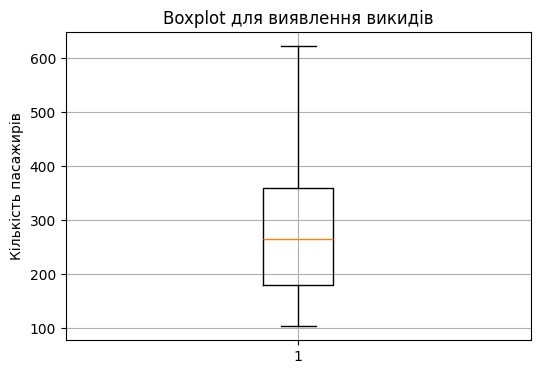

In [51]:

plt.figure(figsize=(6,4))
plt.boxplot(df_interpolated['#Passengers'])
plt.title("Boxplot для виявлення викидів")
plt.ylabel("Кількість пасажирів")
plt.grid(True)
plt.show()

Статистична перевірка (метод IQR)

In [52]:
Q1 = df_interpolated['#Passengers'].quantile(0.25)
Q3 = df_interpolated['#Passengers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_interpolated[
    (df_interpolated['#Passengers'] < lower_bound) |
    (df_interpolated['#Passengers'] > upper_bound)
]

print("Кількість викидів:", len(outliers))
outliers.head()

Кількість викидів: 0


,Month,#Passengers


Часовий ряд перевірено методом міжквартильного розмаху (IQR). Розраховані граничні значення не виявили спостережень за межами допустимого інтервалу. Викиди відсутні.

**Згладжування (ковзне середнє)**

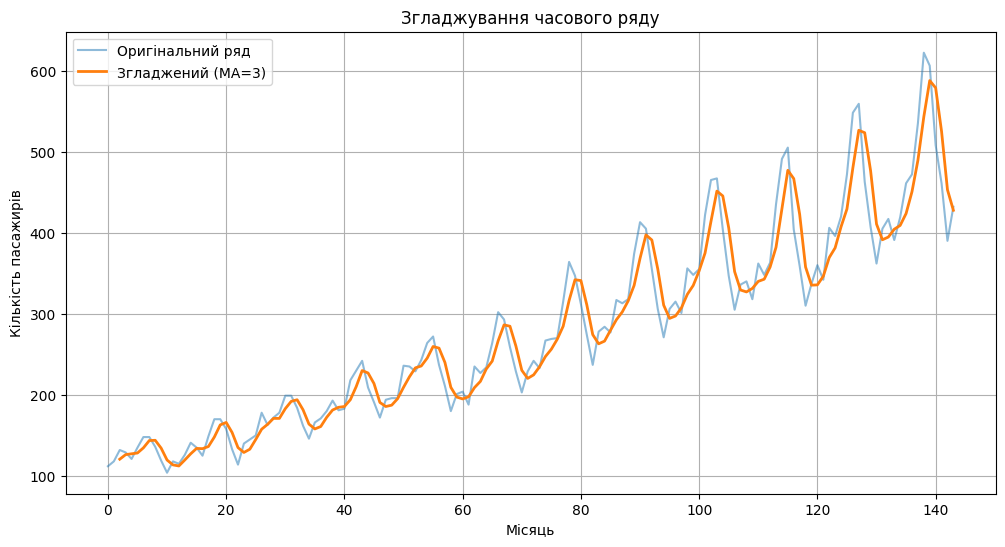

In [53]:
df_no_outliers = df_interpolated.copy()
df_smoothed = df_no_outliers.copy()
df_smoothed['Smoothed'] = df_smoothed['#Passengers'].rolling(window=3).mean()

plt.figure(figsize=(12,6))

plt.plot(df_no_outliers.index, df_no_outliers['#Passengers'], label='Оригінальний ряд', alpha=0.5)
plt.plot(df_smoothed.index, df_smoothed['Smoothed'], label='Згладжений (MA=3)', linewidth=2)

plt.title("Згладжування часового ряду")
plt.xlabel("Місяць")
plt.ylabel("Кількість пасажирів")
plt.legend()
plt.grid(True)
plt.show()

Застосування ковзного середнього дозволило усунути високочастотні коливання та зробити часовий ряд більш структурованим для подальшого аналізу. Після згладжування чітко простежується зростаючий тренд та виражена сезонність, що свідчить про нестаціонарний характер процесу.

#### _Завдання 5_

Нормалізація (Min–Max Scaling)

In [54]:
df_normalized = df_smoothed.copy()

min_val = df_normalized['#Passengers'].min()
max_val = df_normalized['#Passengers'].max()

df_normalized['Normalized'] = (
    (df_normalized['#Passengers'] - min_val) /
    (max_val - min_val)
)

df_normalized.head()

,Month,#Passengers,Smoothed,Normalized
0,1949-01-01,112,NaN,0.015444
1,1949-02-01,118,NaN,0.027027
2,1949-03-01,132,120.666667,0.054054
3,1949-04-01,129,126.333333,0.048263
4,1949-05-01,121,127.333333,0.032819


Стандартизація (Z-score)

In [55]:
df_standardized = df_smoothed.copy()

mean_val = df_standardized['#Passengers'].mean()
std_val = df_standardized['#Passengers'].std()

df_standardized['Standardized'] = (
    (df_standardized['#Passengers'] - mean_val) / std_val
)


df_standardized.head()

,Month,#Passengers,Smoothed,Standardized
0,1949-01-01,112,NaN,-1.402882
1,1949-02-01,118,NaN,-1.352868
2,1949-03-01,132,120.666667,-1.236169
3,1949-04-01,129,126.333333,-1.261176
4,1949-05-01,121,127.333333,-1.327861


Побудова графіка

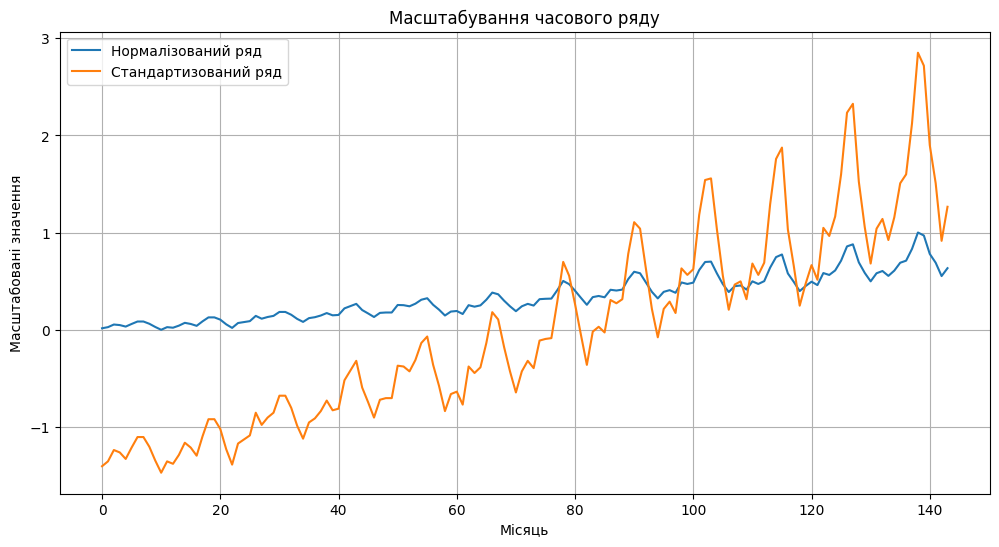

In [56]:
plt.figure(figsize=(12,6))

plt.plot(df_normalized.index, df_normalized['Normalized'],
         label='Нормалізований ряд')

plt.plot(df_standardized.index, df_standardized['Standardized'],
         label='Стандартизований ряд')

plt.title("Масштабування часового ряду")
plt.xlabel("Місяць")
plt.ylabel("Масштабовані значення")
plt.legend()
plt.grid(True)
plt.show()

Після масштабування зберігається характер зростаючого тренду та сезонна структура ряду. Нормалізація забезпечує приведення значень до обмеженого діапазону, тоді як стандартизація дозволяє оцінювати відносні відхилення від середнього рівня процесу. Отримані перетворення є підготовчим етапом для подальшого статистичного аналізу.

#### _Завдання 6_

#### _Завдання 7_